In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('F:\SarlakG\DataScience\datasets\Cars.csv')
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [6]:
df.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [7]:
df.shape

(81, 5)

In [8]:
np.round(np.corrcoef(df), decimals=4)

array([[1.    , 0.9936, 0.9936, ..., 0.157 , 0.2274, 0.2636],
       [0.9936, 1.    , 1.    , ..., 0.2308, 0.3178, 0.3561],
       [0.9936, 1.    , 1.    , ..., 0.2321, 0.3187, 0.3569],
       ...,
       [0.157 , 0.2308, 0.2321, ..., 1.    , 0.963 , 0.9451],
       [0.2274, 0.3178, 0.3187, ..., 0.963 , 1.    , 0.9979],
       [0.2636, 0.3561, 0.3569, ..., 0.9451, 0.9979, 1.    ]])

In [9]:
df.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [10]:
col = ['HP', 'VOL', 'SP', 'WT']
for i in col:
    cor = (df.MPG.corr(df[i]))
    print (('correlation btw MPG and '+i+' : '+ str(cor)))

correlation btw MPG and HP : -0.7250383497637913
correlation btw MPG and VOL : -0.5290565802560919
correlation btw MPG and SP : -0.6871246127261939
correlation btw MPG and WT : -0.5267590900278916


In [11]:
df.MPG.corr(df.WT)

-0.5267590900278916

In [12]:
import seaborn as sns

In [ ]:
# Correlation btw input and ouput

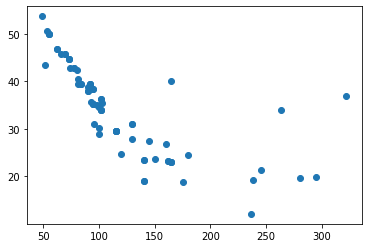

In [105]:
plt.scatter(df.HP, df.MPG)

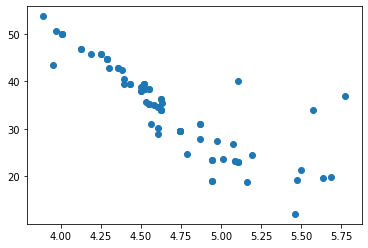

In [107]:
plt.scatter(np.log(df.HP), df.MPG)

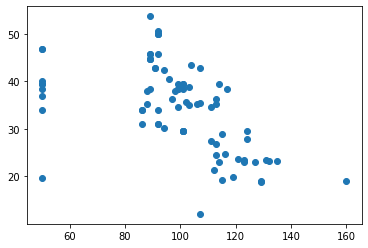

In [117]:
plt.scatter(df.VOL, df.MPG)

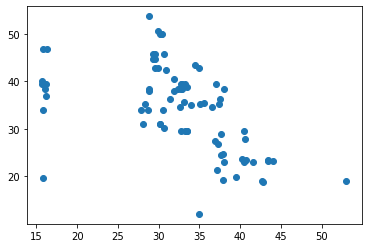

In [118]:
plt.scatter(df.WT, df.MPG)

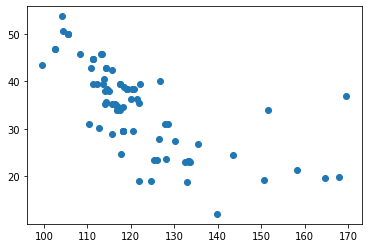

In [119]:
plt.scatter(df.SP, df.MPG)

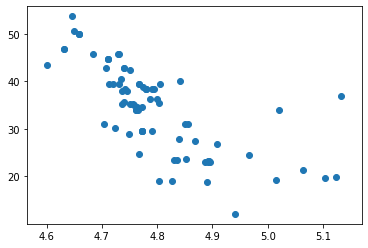

In [122]:
plt.scatter(np.log(df.SP), df.MPG)

In [ ]:
# Multicollinearity test

In [14]:
import statsmodels.formula.api as smf

In [15]:
#m1 = smf.ols('MPG ~ HP + VOL + SP + WT', data = df).fit()

In [16]:
#m1.summary()

In [17]:
#m2 = smf.ols('MPG ~ np.log(HP) + VOL + np.log(SP) + WT', data = df).fit()

In [18]:
#type(m2)

In [19]:
#m2.params

In [20]:
#m2.summary()

In [143]:
m3 = smf.ols('MPG ~ np.log(HP) + WT + np.log(SP)', data = df).fit()

In [144]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     273.4
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           5.97e-41
Time:                        09:15:59   Log-Likelihood:                -194.14
No. Observations:                  81   AIC:                             396.3
Df Residuals:                      77   BIC:                             405.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -146.6711     36.331     -4.037      0.000    -219.016     -74.326
np.log(HP)   -35.7836      2.605    -13.738      0.000     -40.970     -30.597
WT            -0.4101      0.042     -9.762      0.000      -0.494      -0.326
np.log(SP)    75.4239      9.931      7.595      0.000      55.650      95.198
==============================================================================
Omnibus:                       27.467   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.964
Skew:                           0.689   Prob(JB):                     5.55e-37
Kurtosis:                       9.897   Cond. No.                     4.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The Durbin-Watson tests produces a test statistic that ranges from 0 to 4.  Values close to 2 (the middle of the range) suggest less autocorrelation, and values closer to 0 or 4 indicate greater positive or negative autocorrelation respectively.

In [145]:
m3_pred = m3.predict(df)
m3_pred

0     52.701383
1     48.786795
2     48.898859
3     45.604187
4     49.630602
        ...    
76    27.261395
77    20.168515
78    26.190489
79    20.103794
80    16.111565
Length: 81, dtype: float64

In [146]:
import matplotlib.pyplot as plt

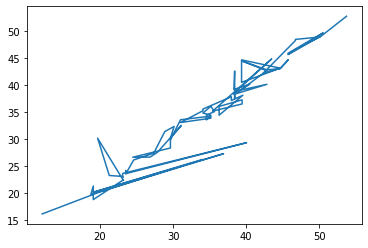

In [147]:
plt.plot(df.MPG,m3_pred)

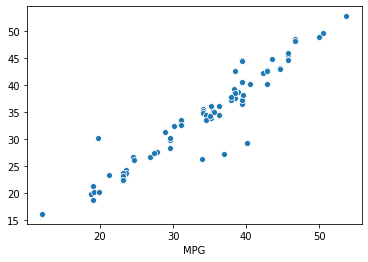

In [148]:
sns.scatterplot(df.MPG,m3_pred)

In [149]:
#z=m3_pred.to_csv('F:\SarlakG\DataScience\datasets\Cars_pred.csv')

In [150]:
df['pred'] = m3_pred
df.head()

,HP,MPG,VOL,SP,WT,pred,error
0,49,53.700681,89,104.185353,28.762059,52.701383,0.664966
1,55,50.013401,92,105.461264,30.466833,48.786795,0.617176
2,55,50.013401,92,105.461264,30.193597,48.898859,0.617176
3,70,45.696322,92,113.461264,30.632114,45.604187,-0.451651
4,53,50.504232,92,104.461264,29.889149,49.630602,0.453789


In [151]:
df['error'] = df['MPG']-df['pred']
df.head()

,HP,MPG,VOL,SP,WT,pred,error
0,49,53.700681,89,104.185353,28.762059,52.701383,0.999299
1,55,50.013401,92,105.461264,30.466833,48.786795,1.226607
2,55,50.013401,92,105.461264,30.193597,48.898859,1.114542
3,70,45.696322,92,113.461264,30.632114,45.604187,0.092136
4,53,50.504232,92,104.461264,29.889149,49.630602,0.873630


In [152]:
np.cov(df.WT,df.error)

array([[5.61422466e+01, 7.71246736e-13],
       [7.71246736e-13, 7.15692523e+00]])

In [153]:
df.HP.corr(df.error)

0.04166379661384257

In [154]:
df.SP.corr(df.error)

0.004352977003292515

In [155]:
df.WT.corr(df.error)

3.847558265654389e-14

In [156]:
df.VOL.corr(df.error)

0.0026019941408285114

(array([ 1.,  0.,  3.,  7., 31., 34.,  2.,  0.,  1.,  2.]),
 array([-10.45413292,  -8.33410802,  -6.21408313,  -4.09405823,
         -1.97403333,   0.14599156,   2.26601646,   4.38604135,
          6.50606625,   8.62609115,  10.74611604]),
 <a list of 10 Patch objects>)

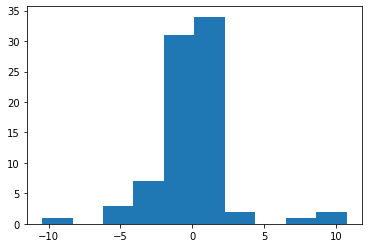

In [157]:
plt.hist(df.error)    # errors are normaly dist

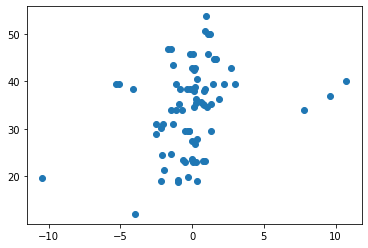

In [158]:
plt.scatter(df.error, df.MPG)

In [ ]:
# No Endogeneity test(error should not be dependent on independent valraibles)

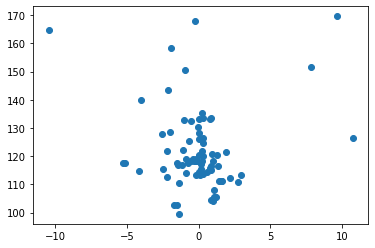

In [159]:
plt.scatter(df.error, df.SP)

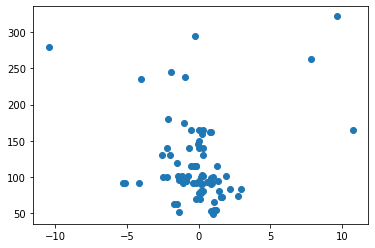

In [160]:
plt.scatter(df.error, df.HP)

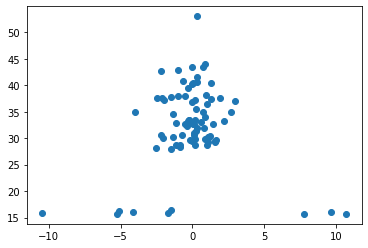

In [161]:
plt.scatter(df.error, df.WT)